<IPython.core.display.Javascript object>


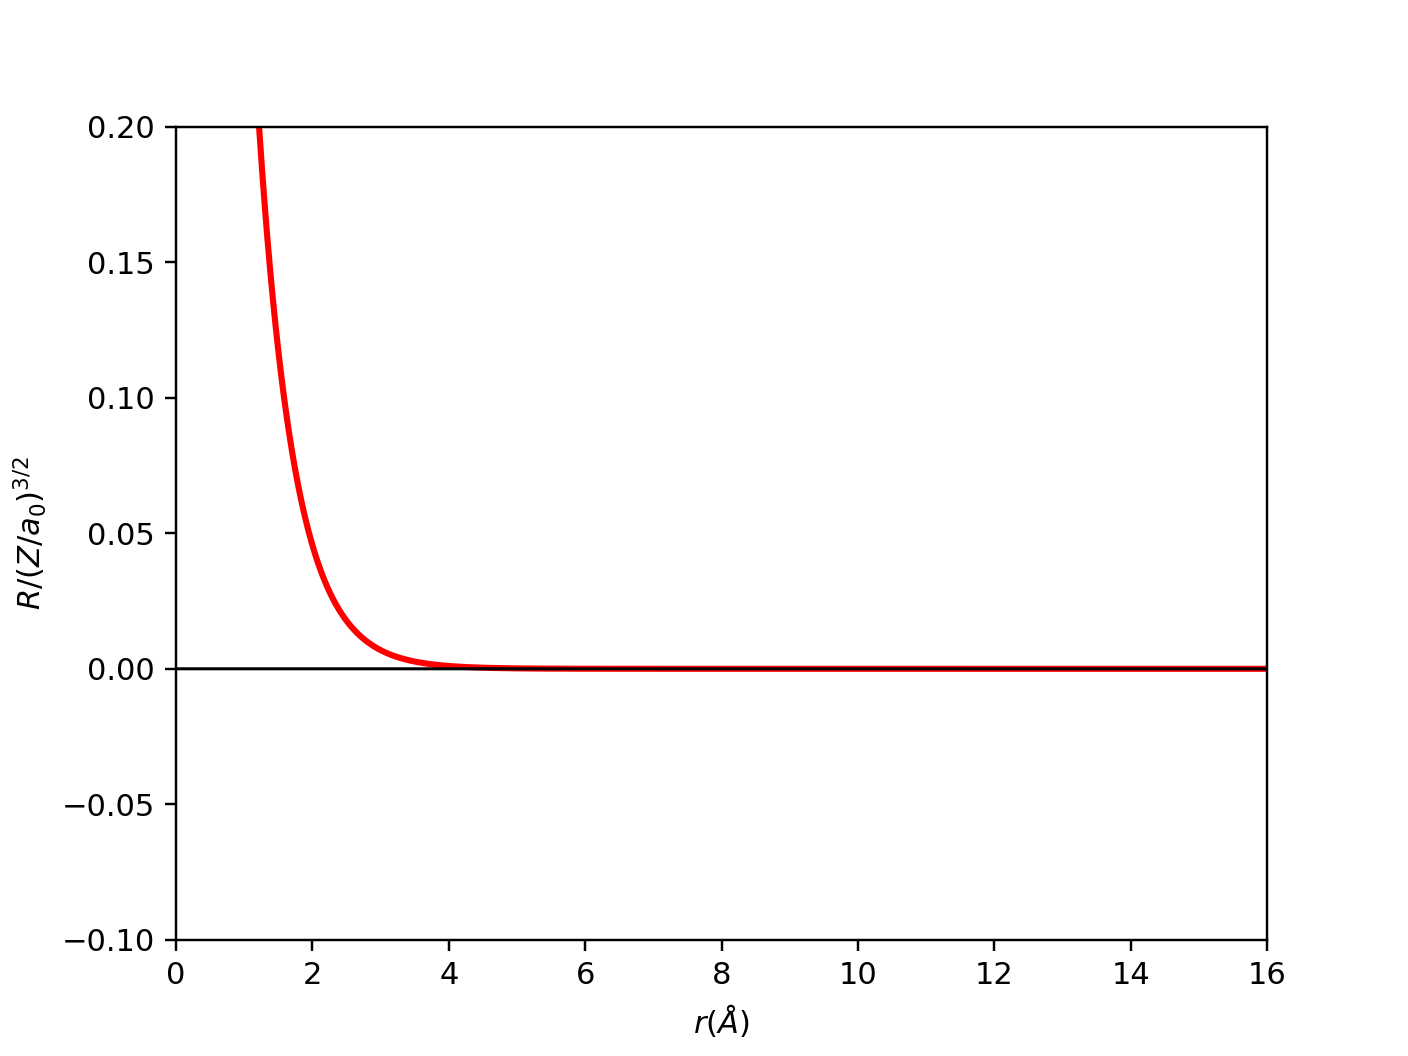

In [3]:
from pylab import *
from ipywidgets import *
from scipy.special import binom 
from scipy.constants import epsilon_0, hbar, electron_mass, elementary_charge
from scipy.misc import factorial
%matplotlib notebook

#initial values
n0=1
l0=0
Z0=1

#create data
x = arange(0, 16, 0.01)

        
def R(r, n, l, Z):
    a0 = 0.529
    rho = 2 * Z * r / (n*a0)
    
    if n == 1:
        if l == 0:
            return 2 * exp(-rho/2.0)
    elif n == 2:
        if l == 0:
            return sqrt(1.0/8.0)*(2-rho) * exp(-rho/2.0)
        elif l == 1:
            return sqrt(1.0/24.0)*rho * exp(-rho/2.0)
    elif n == 3:
        if l == 0:
            return sqrt(1.0/243.0)*(6-6*rho+rho**2) * exp(-rho/2.0)
        elif l == 1:
            return sqrt(1.0/486.0)*(4-rho) * rho * exp(-rho/2.0)
        elif l == 2:
            return sqrt(1.0/2430.0) * rho**2 * exp(-rho/2.0)
    
    
y = R(x, n0, l0, Z0)

#create plot
fig1 = figure()
ax1 = fig1.add_subplot(111)
curve1, = plot(x, y, lw=2, color='red')
zero, = plot(x, 0*x, lw=1, color='black')
axis([0, 16, -0.1, 0.2])
xlabel('$r (\AA)$')
ylabel('$R/(Z/a_0)^{3/2}$')

n_slider = IntSlider(min=1, max=3, value=1)
l_slider = IntSlider(min=0, max=0)
z_slider = IntSlider(min=1, max=10)
def update_l_range(*args):
    l_slider.max = n_slider.value -1
n_slider.observe(update_l_range, 'value')
def update(n=n0, l=l0, Z=Z0):
    curve1.set_ydata(R(x, n, l, Z))
i=interact(update,n=n_slider,l=l_slider,Z=z_slider)